<a href="https://colab.research.google.com/github/Harun2703/Python/blob/master/icp-6/ICP_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing required Libraries

In [70]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans

In [71]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Remove any null values by the mean.


In [72]:
dataset = pd.read_csv("/content/drive/My Drive/Python Deep learning/ICP-6/CC.csv")

In [73]:
X = dataset.iloc[:, 1:]

In [74]:
X = X.select_dtypes(include=[np.number]).interpolate().fillna(X.select_dtypes(include=[np.number]).interpolate().mean(axis=0))

# Elbow Method

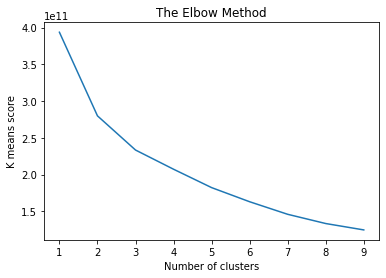

In [75]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,10):
  kmeans = KMeans(n_clusters=i, random_state=42)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)
plt.plot(range(1,10),wcss)
plt.title("The Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("K means score")
plt.show()

# KMeans Model without scaling

In [76]:
# k=3
kmeans = KMeans(n_clusters=3, random_state=40)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=40, tol=0.0001, verbose=0)

In [77]:
y_cluster_kmeans = kmeans.predict(X)

# Calculating score

In [78]:
from sklearn import metrics
score = metrics.silhouette_score(X, y_cluster_kmeans)

# Data Scaling

In [79]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X)
X_scaled = sc.transform(X)

# KMeans Model after Scaling

In [80]:
scaled_kmeans = KMeans(n_clusters=3, random_state=42)
scaled_kmeans.fit(X_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

In [81]:
y_scaled_kmeans = scaled_kmeans.predict(X_scaled)

In [82]:
scaled_score = metrics.silhouette_score(X, y_scaled_kmeans)

# Applying PCA on data

In [83]:
from sklearn.decomposition import PCA
pca = PCA(3)
X_pca = pca.fit_transform(X)

# KMeans model after applying PCA

In [84]:
kmeans_pca = KMeans(n_clusters=3)
kmeans_pca.fit(X_pca)
y_pca_kmeans= kmeans_pca.predict(X_pca)
pca_score = metrics.silhouette_score(X_pca, y_pca_kmeans)

# KMeans Model after applying PCA on scaled Data

In [86]:
pca_scaled = PCA(2)
X_pca_scaled= pca_scaled.fit_transform(X_scaled)

In [87]:
kmeans_pca_scaled = KMeans(n_clusters=3)
kmeans_pca_scaled.fit(X_pca_scaled)
y_pca_kmeans_scaled = kmeans_pca_scaled.predict(X_pca_scaled)
pca_scaled_score = metrics.silhouette_score(X_pca_scaled, y_pca_kmeans_scaled)
y_pca_kmeans_scaled

array([0, 1, 0, ..., 0, 0, 0], dtype=int32)

# Score comparisons

In [88]:
print("Score before Scaling :", score)
print("Score after Scaling :", scaled_score)
print("Score after applying PCA:",pca_score)
print("Score after applying PCA on scaled data:",pca_scaled_score)

Score before Scaling : 0.46495602530855307
Score after Scaling : 0.3394686960076873
Score after applying PCA: 0.5112274938487961
Score after applying PCA on scaled data: 0.45074852503184565


# Plotting Clusters

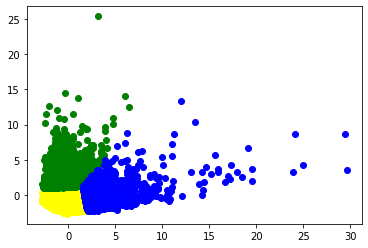

In [89]:
colors = ["yellow", "green", "blue"]
for i in range(3):
    x_axis = X_pca_scaled[y_pca_kmeans_scaled == i][:,0]
    y_axis = X_pca_scaled[y_pca_kmeans_scaled == i][:,1]
    plt.scatter(x_axis,y_axis,color=colors[i]) 

# PCA +KMeans



In [90]:
km = KMeans(n_clusters=3)
km.fit(X_pca)
Y_cluster_kmeans= km.predict(X_pca)
from sklearn import metrics
pca_means_score = metrics.silhouette_score(X_pca, Y_cluster_kmeans)
print('PCA+ Kmeans score is:', pca_means_score)

PCA+ Kmeans score is: 0.5112274938487961


# KMeans +PCA + scaling


In [94]:
pca = PCA(3)
X_pca_scaled = pca.fit_transform(X_scaled)

km = KMeans(n_clusters=3)
km.fit(X_pca_scaled)
Y_cluster_kmeans= km.predict(X_pca_scaled)
from sklearn import metrics
pca_means_scale_score = metrics.silhouette_score(X_pca_scaled, Y_cluster_kmeans)
print('PCA+KMEANS+ Scale score is:', pca_means_scale_score)

PCA+KMEANS+ Scale score is: 0.38062897873357365


# Visualising

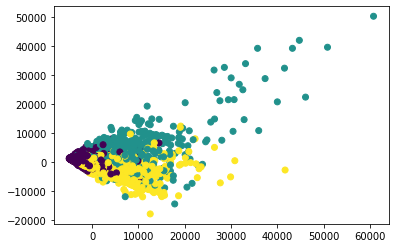

In [99]:

plt.scatter(X_pca[:, 0], X_pca[:, 1], c = Y_cluster_kmeans)
plt.show()